# Regression - Predict 
 introdunctions texts to be written here
 


body starts here with 
## Imports 



In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import datetime

# Figures inline and set visualization style
%matplotlib inline
sns.set()


## Data Loading and Preprocessing

### Importing Datasets 

#### Train data

In [3]:
train_df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Train.csv')

In [3]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


#### Test data

In [4]:
test_df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Test.csv')

In [5]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


#### Additional Datasets
Riders ,Variable Defition 

In [5]:
riders = pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Riders.csv')

### Processing Data

Create a new DataFrame data that consists of training and test sets combined. You do this because you want to preprocess the data a little bit and make sure that any operations that you perform on the training set are also being done on the test data set.

In [8]:
# Concatenate training and test sets
data = pd.merge(train_df,riders,on ='Rider Id')

In [9]:
data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


Check out your new DataFrame data using the info() method.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

There are 7 numerical variables that have missing values.

What are they?

That's right, you're missing values for the Arrival at Destination - Day of Month ,Arrival at Destination - Weekday (Mo = 1) ,Arrival at Destination - Weekday (Mo = 1),Temperature,Precipitation in millimeters and Time from Pickup to Arrival  columns! You see in the result of the .info() method above that you're missing.Ideally, you of course want all of those 28269 to have non-null values, but that isn't the case here!
However, now you'll focus on fixing the numerical variables: you will impute or fill in the missing values for the columns, using the median of the of these variables where you know them.

Note that in this case, you use the median because it's perfect for dealing with outliers. In other words, the median is useful to use when the distribution of data is skewed. Other ways to impute the missing values would be to use the mean, which you can find by adding all data points and dividing by the number of data points, or mode, which is the number that occurs the highest number of times.

#### Missing Values

In [9]:
# Impute missing numerical variables
data[missing value colum] = data.Age.fillna(data.Age.median())
data[mssing value colum] = data.Fare.fillna(data.Fare.median())

# Check out info of data
data.info()

SyntaxError: invalid syntax (<ipython-input-9-c24a74d355e6>, line 2)

Comments on the data
** the follwoing columns needs to be restructed order_no,user_id and rider _id**
**we need to combine the test and train data so that when we do the EDA BOTH DATASETS CAN BE CLEANED AND SEPERATE THEM AFTER **

In [25]:
train_df['Order No']=train_df['Order No'].str.rpartition('_')[2]
train_df['User Id']=train_df['User Id'].str.rpartition('_')[2]
train_df['Rider Id']=train_df['Rider Id'].str.rpartition('_')[2]
 

In [28]:
train_df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [31]:
train_df['Order No']=train_df['Order No'].astype(int)
train_df['User Id']=train_df['User Id'].astype(int)
train_df['Rider Id']=train_df['Rider Id'].astype(int)
 

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  int64  
 1   User Id                                    21201 non-null  int64  
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

## Data Visualisation

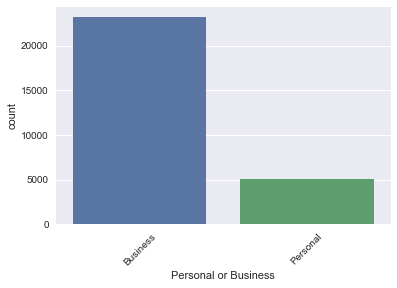

In [33]:
sns.countplot(x='Personal or Business', data=data);
plt.xticks(rotation=45);

(array([   0,    1,    2, ..., 4064, 4065, 4066]),
 <a list of 4067 Text xticklabel objects>)

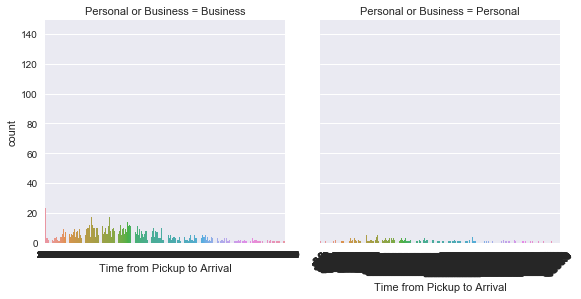

In [33]:
sns.factorplot(x='Time from Pickup to Arrival', col='Personal or Business', kind='count', data=data)
plt.xticks(rotation=45)

import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset(train_df)
g = sns.pairplot(iris)

we need a function that can help us find relationship between varibles please check this link https://seaborn.pydata.org/generated/seaborn.pairplot.html

## Trying some EDA

## Check dist of target variable

In [11]:
data = pd.merge(train_df,riders,on ='Rider Id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64


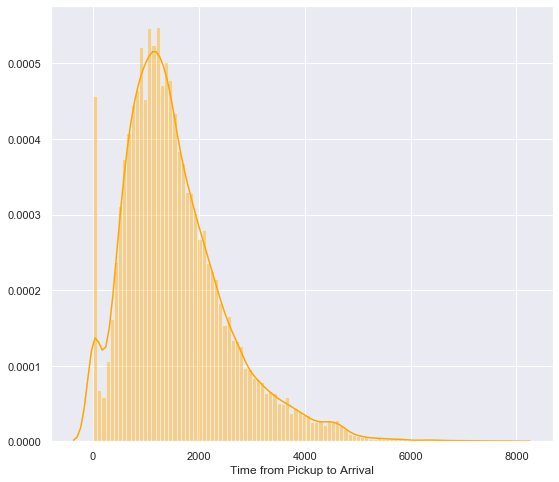

In [12]:
print(data['Time from Pickup to Arrival'].describe())
plt.figure(figsize=(9,8))
sns.distplot(data['Time from Pickup to Arrival'],color='orange',bins=100,hist_kws={'alpha':0.4})
plt.show()

## dist of numeric features

In [14]:
df_num = data.select_dtypes(include = ['float64','int64'])
df_num.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,9,5,9,5,9,5,9,5,9,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,18,5,18,5,18,5,18,5,18,...,NaN,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549
2,3,31,5,31,5,31,5,31,5,31,...,NaN,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549
3,3,2,2,2,2,2,2,2,2,2,...,NaN,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549
4,2,22,2,22,2,22,2,22,2,22,...,NaN,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549


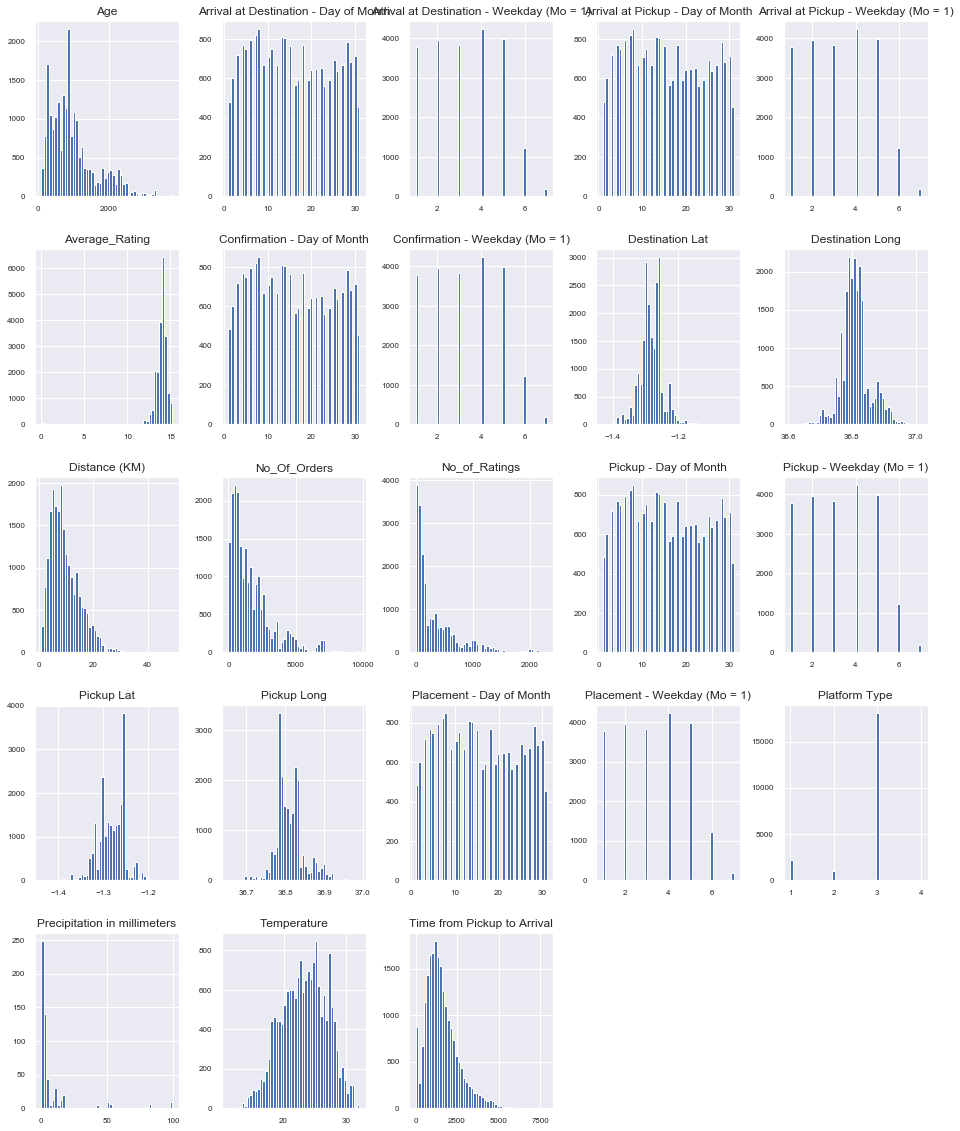

In [15]:
df_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

The idea here is to look for a variable that is distributed similarly to the desired variable, as that might show that they have some form of relationship with one another.

From first glance, it looks like age, Distance, no of orders and no of ratings have a similar distibution to the desired variable as they are both skewed to the right.

## Correlation

It doesn't help to just look for variables that are distributed the same, we need to check how they are correlated

In [16]:
df_num_corr = df_num.corr()['Time from Pickup to Arrival'][:-1]
best_features_list = df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending = False)
print('ther is {} strong correlated values with Time from Pickup to Arrival: \n{}'.format(len(best_features_list),best_features_list))

ther is 2 strong correlated values with Time from Pickup to Arrival: 
Time from Pickup to Arrival    1.000000
Distance (KM)                  0.580608
Name: Time from Pickup to Arrival, dtype: float64


By only considering to variables with a high correlation, we find that distance is the only variable that is highly correlated to the desired variable

## Try find any other form of relationsip

These methods have given us a considerable amount of information to consider. It would also help to get a visual of how each variable acts against our desired variable to see if we may find any form of relation we are unable to configure from any of the above mentioned methods

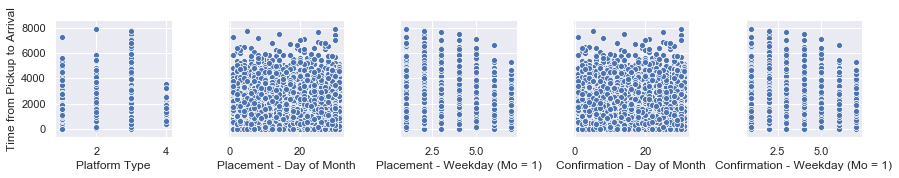

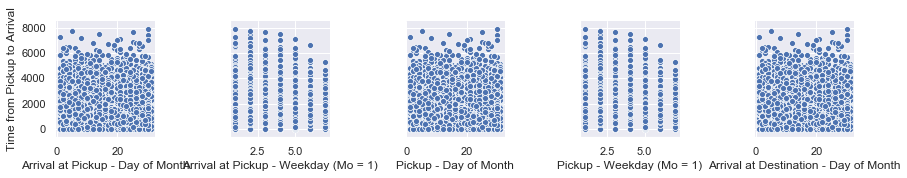

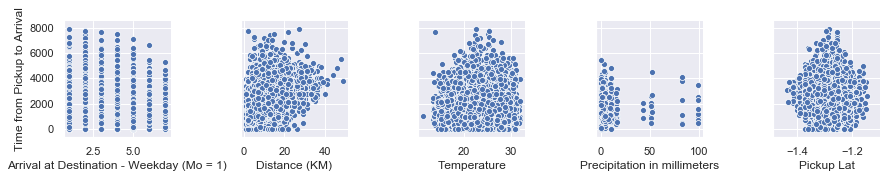

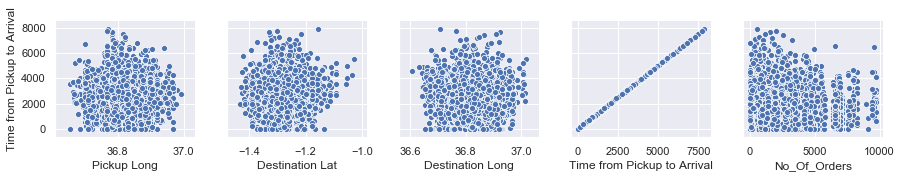

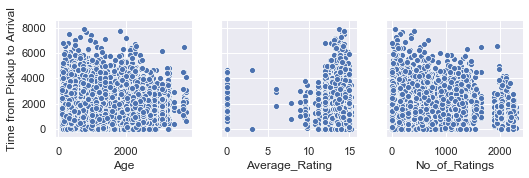

In [17]:
for i in range(0,len(df_num.columns),5):
    sns.pairplot(data=df_num,x_vars=df_num.columns[i:i+5],y_vars=['Time from Pickup to Arrival'])

It's evident that distance has the best relationship here. It's also worth mentioning that it would probably be a good idea to find a way to represent long lat and time, to see what kind of relationship those have with the desired variable.

## Categorical variables

First we need to isolate the categorical variables from the dataframe

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [20]:
cat_features_list=['Order No','User Id','Vehicle Type','Personal or Business','Rider Id','Time from Pickup to Arrival']
df_cat_features=data[cat_features_list]
df_cat_features.head()

,Order No,User Id,Vehicle Type,Personal or Business,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,Business,Rider_Id_432,745
1,Order_No_27440,User_Id_2642,Bike,Personal,Rider_Id_432,2886
2,Order_No_14170,User_Id_3339,Bike,Business,Rider_Id_432,2615
3,Order_No_21727,User_Id_3523,Bike,Personal,Rider_Id_432,2986
4,Order_No_8301,User_Id_87,Bike,Personal,Rider_Id_432,1602


## represent graphically

C:\Users\modis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0, 1]), <a list of 2 Text xticklabel objects>)

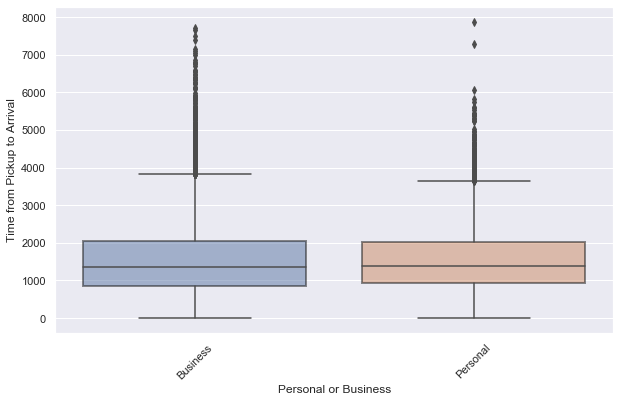

In [21]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x='Personal or Business',y='Time from Pickup to Arrival',data=df_cat_features)
plt.setp(ax.artists,alpha=0.5,linewidth=2,edgecolor='K')
plt.xticks(rotation=45)

The other categorical variables are too large to represent with a boxplot so we'll just consider personal orbusiness. its worth noting that we should probably consider vehicle type, weekdays and day of month as categorical variables. 

we can see that 75% of the data is below 2000 seconds, so most trips take below 2000 seconds to do.
There are a lot of outliers in the data as well.
But from this we can see that w=thiss also has a similar distribution to our desired variable.

## Time to build a model

## representing personal or business as 1's and 0's

In [22]:
train_df['Personal or Business'] =train_df['Personal or Business'].apply(lambda x: 1 if x in ['Business'] else 0)
test_df['Personal or Business'] = test_df['Personal or Business'].apply(lambda x: 1 if x in ['Business'] else 0)

## Trying Random forest

In [23]:
D = test_df[['Distance (KM)']].values

In [24]:
X=train_df[['Distance (KM)']].values
y= train_df['Time from Pickup to Arrival'].values

## Training the model

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## predicting y

In [26]:
y_pred = regressor.predict(X).reshape(len(X),1)

## Evaluating the model

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = sqrt(mean_squared_error(y,y_pred))
mse

797.7072336821212

In [28]:
from sklearn.metrics import r2_score

r2_score(y,y_pred)

0.34711758429202655

## Converting to csv

In [ ]:
results = pd.DataFrame()
results['Order No'] = test_df['Order No']
results['Time from Pickup to Arrival'] = y_pred
results.reset_index(drop=True,inplace=True)

In [ ]:
results.to_csv(r'results_3.csv',sep=',',index=False)
results.head()